# Recognizing Digits with Convolutional Neural Networks
Convolutional Neural Networks (CNN) | TMNIST | Google Fonts | TensorFlow | Keras | Python | Jupyter Notebook

## Abstract
This notebook walks you through a use case for Convultional Neural Networks, a type of neural network that is particularly well-suited for image classification. We'll use a dataset of 2,990 Google fonts to train a model to recognize numeric digits. The model we build below achieves an impressive accuracy of 99.4% on the test set, showcasing its ability to accurately classify the majority of instances.

## Installing the Necessary Packages and Libraries
We'll need to install the following packages and libraries to run this notebook.

In [70]:
!pip install tensorflow
!pip install  pandas
!pip install  numpy
!pip install  keras
!pip install  matplotlib
!pip install  seaborn

In [71]:
import numpy as np 
import pandas as pd 
import tensorflow as tf 
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras import layers
from sklearn.metrics import confusion_matrix
import seaborn as sns

## Reading in the Data
This dataset, [TMNIST (Typeface MNIST)](https://www.kaggle.com/datasets/nimishmagre/tmnist-typeface-mnist), was uploaded to Kaggle by Nimish Magre. For this notebook, I've downloaded it and added it to my GitHub-hosted repo so that I can easily access it.

In [73]:
# Adding the dataset from github
!wget https://raw.githubusercontent.com/vishnuraosharma/TMNIST-Alphabet/main/TMNIST_Data.csv

zsh:1: command not found: wget


In [74]:
# Reading the dataset
dff = pd.read_csv('TMNIST_Data.csv')

# Viewing the first few rows
dff.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,GrandHotel-Regular,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,EncodeSansCondensed-Medium,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Varela-Regular,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ArefRuqaa-Bold,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,KulimPark-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
# Checking the shape of the dataframe
dff.shape

(29900, 786)

In [76]:
# Describing the dataframe
dff.describe()

,labels,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,29900.000000,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,...,29900.000000,29900.000000,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0
mean,4.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.003445,0.000033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.872329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.493058,0.005783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,84.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We can see here the data consists of 29.9K rows where each row contains 786 attributes. Though I've downloaded a portion of it from Kaggle, the data originally comes from [Google's public repo](https://github.com/google/fonts) of fonts. 

Aside from *names* (of the fonts) and *labels* (that tell us which number is being represented), the rest of the columns are pixel values for a 28 x 28 image. Each value is a number between 0-255, which represents the intensity of the pixel. 0 is white, 255 is black.

Below, we can see that each of the 2,990 fonts in scope has complete data for each digit (0-9). 

In [77]:
# For each label, counting the number of rows
dff['labels'].value_counts().sort_index()

0    2990
1    2990
2    2990
3    2990
4    2990
5    2990
6    2990
7    2990
8    2990
9    2990
Name: labels, dtype: int64

## Train Test Split
Let's split the data into train and test sets. We'll use 80% of the data for training and 20% for testing. Remember to set the random state to 1 so that the results are reproducible.

In [78]:
# Splitting the data into train and test sets
df = dff.copy()
X = df.drop(columns= {'names', 'labels'}, axis = 1)
y =  df[['labels']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)
np.random.seed(42)

Let's now reshape the data into 28 x 28 images.

In [79]:
# Setting our length and width variables
l,w = 28,28

# Reshaping the data into 28 x 28 images
X_train = X_train.values.reshape(X_train.shape[0], l, w, 1)
X_test = X_test.values.reshape(X_test.shape[0], l, w, 1)

# Turning the labels into 1D numpy arrays
y_train = y_train.values.reshape((-1,))
y_test = y_test.values.reshape((-1,))

In [80]:
# Checking the shape of the data to make sure everything went well
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])
print(y_test.shape[0])

(23920, 28, 28, 1)
(5980, 28, 28, 1)
23920
5980


Let's take a look at the three examples of each digit in the training set.

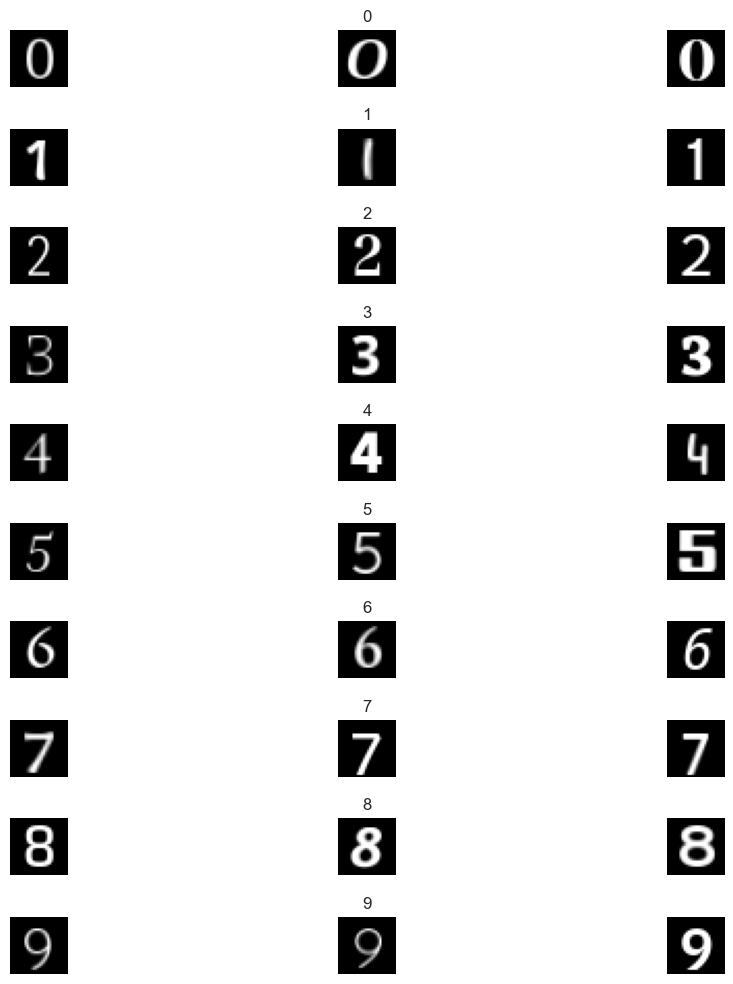

In [81]:
# For each label, plot 3 images
fig, ax = plt.subplots(10,3, figsize = (10,10))
fig.tight_layout()
for i in range(10):
    for j in range(3):
        ax[i,j].imshow(X_train[y_train == i][j].reshape(28,28), cmap = 'gray')
        ax[i,j].axis('off')
        if j == 1:
            ax[i,j].set_title(str(i))

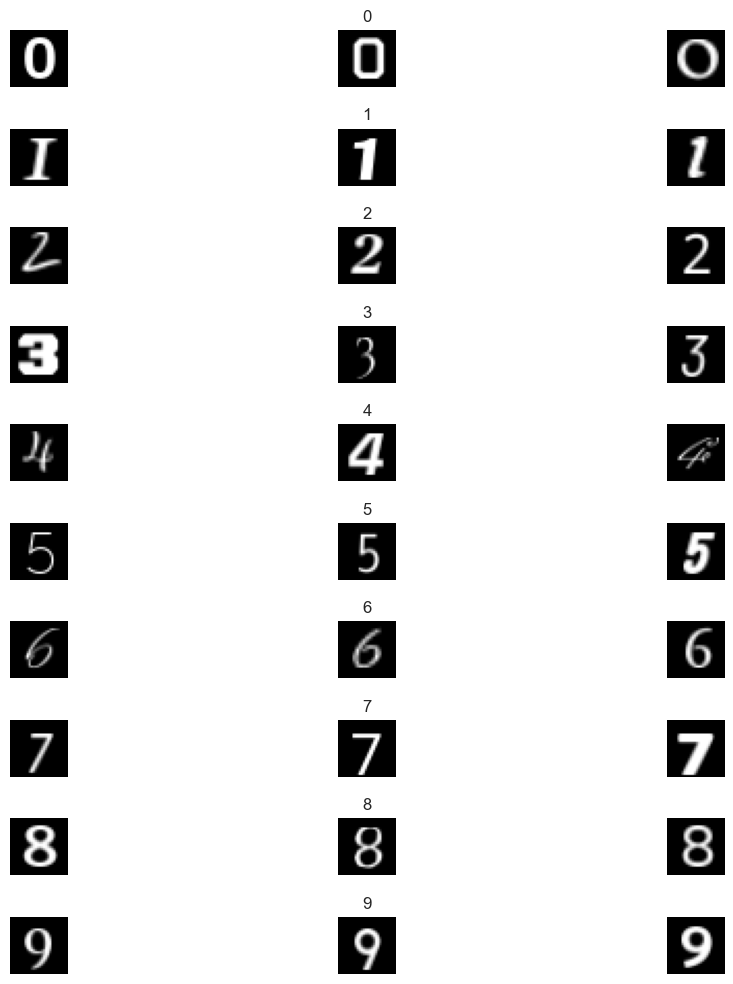

In [82]:
# For each label, plot 3 images from the test set
fig, ax = plt.subplots(10,3, figsize = (10,10))
fig.tight_layout()
for i in range(10):
    for j in range(3):
        ax[i,j].imshow(X_test[y_test == i][j].reshape(28,28), cmap = 'gray')
        ax[i,j].axis('off')
        if j == 1:
            ax[i,j].set_title(str(i))

We did a good job setting up our train and test sets - the images look like digits (to me, at least)!

# Normalizing the Data and One-Hot Encoding the Labels
This dataset is a little bit confusing because our labels seem numerical, but they're actually categorical - we have 10 categories, one for each digit. We'll need to one-hot encode the labels so that our model treats them as such.

In [83]:
# One-hot encoding the labels
y_train = to_categorical(y_train, num_classes = 10, dtype= 'int')
y_test = to_categorical(y_test, num_classes = 10, dtype= 'int')

To make the model converge faster, we'll also normalize the data by dividing each pixel value by 255.

In [84]:
# Normalizing the data as a float32 so we can hang on to the decimal points
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

# Reshape once more
X_train = X_train.reshape(X_train.shape[0], l, w, 1)
X_test = X_test.reshape(X_test.shape[0], l, w, 1)

print(f'X:Train, Test data shape:{X_train.shape},{X_test.shape}')
print(f'Y:Train, Test data shape:{y_train.shape},{y_test.shape}')

X:Train, Test data shape:(23920, 28, 28, 1),(5980, 28, 28, 1)
Y:Train, Test data shape:(23920, 10),(5980, 10)


# Building the CNN
Now that we've preprocessed the data, we can build our model. We'll use a convolutional neural network (CNN). 

In [85]:
# Building the CNN
tf.random.set_seed(1)
model = Sequential()

# First convolutional layer
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(layers.MaxPooling2D((2,2)))

# Second convolutional layer
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

# Third convolutional layer
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))

# Adding a dense layer
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))

# Output layer
model.add(layers.Dense(10, activation = 'softmax'))


# Compiling the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Printing the model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_5 (Flatten)         (None, 576)              

Our sequential model consists of three convolutional layers, with 1 & 2 followed by a max pooling layer: 
1. The **first convolutional layer** has 32 filters of size (3, 3); using a smaller number of filters in the initial layers (e.g., 32) allows the model to capture basic patterns without overwhelming computational complexity. It expects input images of shape (28, 28, 1). The max-pooling layer helps reduce the computational load by reducing the dimensionality of the data.
2. The **second convolutional layer** has 64 filters of size (3, 3) and uses ReLU activation, followed by another max-pooling layer. Increasing the number of filters in later layers (e.g., 64) allows the network to learn a larger variety of features
3. The **third convolutional layer** has 64 filters of size (3, 3) and uses ReLU activation.

We then flatten the data into a 1D array with 576 elements and add a dense layer with 64 neurons. For this step, and ones prior, we use the **ReLU activation function**. This is because ReLU is defined as f(x)=max(0,x), which means that if the input is positive, it returns the input; otherwise, it returns zero. This is a good choice for hidden layers of the network because it allows the model to learn nonlinear relationships 

Finally, we have an output layer with 10 nodes (one for each digit) and a **SoftMax activation function**. We switch over to Softmax because we're now dealing with classification - we want to assign probabilities to each class, ensuring a valid probability distribution.

We compile the model using the **Adam optimizer** and the **categorical cross-entropy loss function**. The Adam can handle sparse gradients on noisy problems. The categorical cross-entropy loss function is a common choice for multi-class classification problems. It is a loss function that is required to train neural networks that output a softmax probability distribution for a classification problem. It is a generalization of the binary cross-entropy loss function, which is used for binary classification problems.

# Fitting the Model and Evaluating Performance
Let's fit the model with 10 epochs and a batch size of 64 to mitigate overfitting tendencies. We'll also use the testing data (20% of the original dataset) for validation. 

*NOTE: Neural Networks are stochastic, meaning that the same code and the same data can produce a different result each time it is run. This is because the weights are randomly initialized. Your results might be slightly different from mine, but should converge to a similar result.*

In [86]:
# Fitting the model
history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test), batch_size=64, shuffle= False)

# Evaluating the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Epoch 1/10
374/374 [==============================] - 10s 27ms/step - loss: 0.2618 - accuracy: 0.9244 - val_loss: 0.0783 - val_accuracy: 0.9784
Epoch 2/10
374/374 [==============================] - 10s 26ms/step - loss: 0.0613 - accuracy: 0.9831 - val_loss: 0.0526 - val_accuracy: 0.9838
Epoch 3/10
374/374 [==============================] - 10s 26ms/step - loss: 0.0411 - accuracy: 0.9885 - val_loss: 0.0522 - val_accuracy: 0.9836
Epoch 4/10
374/374 [==============================] - 10s 26ms/step - loss: 0.0303 - accuracy: 0.9917 - val_loss: 0.0430 - val_accuracy: 0.9865
Epoch 5/10
374/374 [==============================] - 10s 26ms/step - loss: 0.0232 - accuracy: 0.9931 - val_loss: 0.0413 - val_accuracy: 0.9873
Epoch 6/10
374/374 [==============================] - 10s 26ms/step - loss: 0.0185 - accuracy: 0.9946 - val_loss: 0.0384 - val_accuracy: 0.9881
Epoch 7/10
374/374 [==============================] - 10s 26ms/step - loss: 0.0135 - accuracy: 0.9959 - val_loss: 0.0392 - val_accuracy:

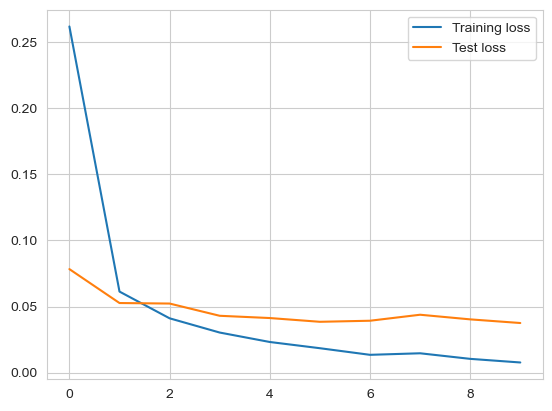

In [87]:
# Plotting the training and test loss
plt.plot(history.history['loss'], label = 'Training loss')
plt.plot(history.history['val_loss'], label = 'Test loss')
plt.legend()
plt.show()

We can see that the model loss is starting to plateau at 5 epochs, but our model seems to a pretty incredible job at classifying digits.

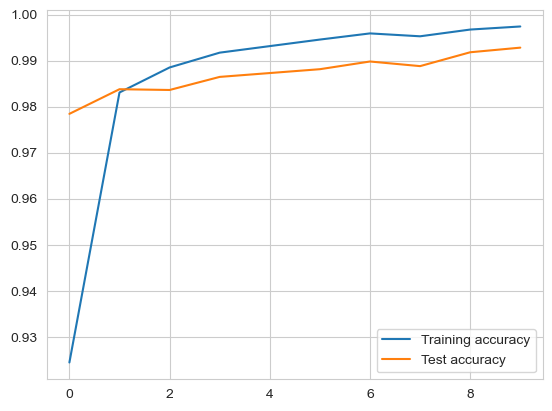

In [88]:
# Plotting the training and test accuracy
plt.plot(history.history['accuracy'], label = 'Training accuracy')
plt.plot(history.history['val_accuracy'], label = 'Test accuracy')
plt.legend()
plt.show()

The accuracy is excellent with a peak test accuracy of about 99.3%! Let's explore some specific examples to see where the model does well and where it struggles.

187/187 [==============================] - 1s 5ms/step


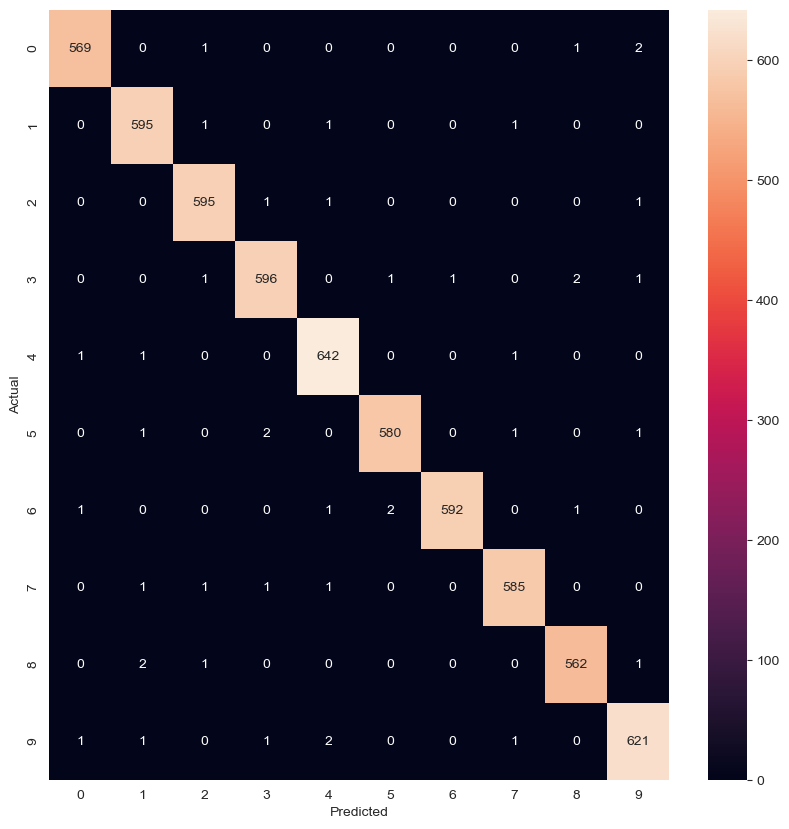

In [94]:
# Create a confusion matrix of the test labels vs. the predicted labels
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_t = np.argmax(y_test, axis = 1)
cm = confusion_matrix(y_t, y_pred)

# Plot the confusion matrix
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

We can see here that the model does a great job at classifying the digits. We have such a small number of errors, but the model seemed to struggle with similar looking digits; for example we predicted: 
- 8 instead of 3 
- 5 instead of 6

This makes sense, but there are still a few errors that are a little bit surprising: let's take a look at some of the images that were misclassified.

187/187 [==============================] - 1s 5ms/step
(5980, 10)
(5980, 10)
[ 12 111 256 360]


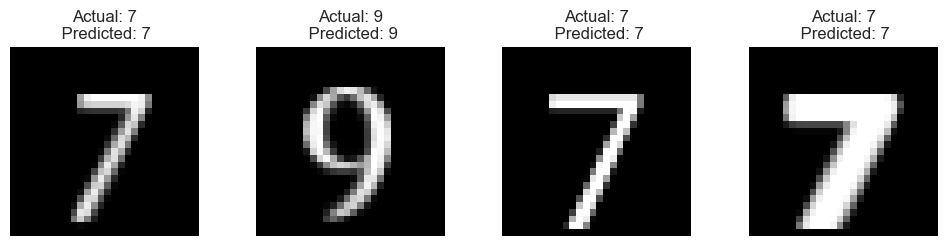

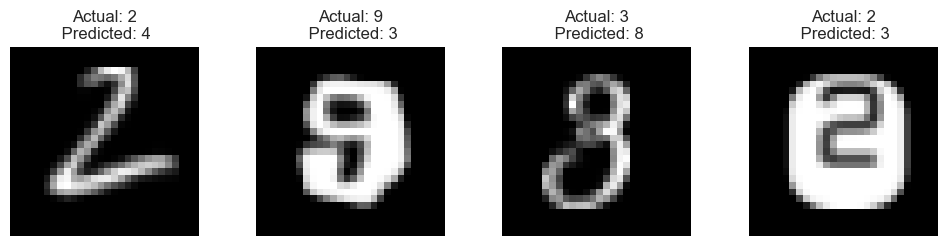

In [90]:
# Predicting the first 4 images in the test set
fourpredictions = model.predict(X_test[:4])

# Plotting the first 4 images in the test set
fig, ax = plt.subplots(1,4, figsize = (10,10))
fig.tight_layout()
for i in range(4):
    ax[i].imshow(X_test[i].reshape(28,28), cmap = 'gray')
    ax[i].axis('off')
    ax[i].set_title(f'Actual: {np.argmax(y_test[i])}\n Predicted: {np.argmax(fourpredictions[i])}')


# Get actual labels from the test set
labels = np.argmax(y_test, axis = 1)
predictions = model.predict(X_test)

print(y_test.shape)
print(predictions.shape)

# Get indices corresponding to test images which were misclassified
misclassified_indices = np.where(labels != predictions.argmax(axis=1))

# Get 4 misclassified images
misclassified = misclassified_indices[0][:4]
print(misclassified)

# Plot the misclassified images
fig, ax = plt.subplots(1,4, figsize = (10,10))
fig.tight_layout()
for i in range(4):
    ax[i].imshow(X_test[misclassified[i]].reshape(28,28), cmap = 'gray')
    ax[i].axis('off')
    ax[i].set_title(f'Actual: {np.argmax(y_test[misclassified[i]])}\n Predicted: {np.argmax(predictions[misclassified[i]])}')

In the top row, we can see the model crushed it when fonts were "typical-looking" and followed conventional shapes; in the bottom row, we start to see that model has a harder time classifying, for a lack of a better term, "whacky" fonts. There's likely a little bit of overfitting to service the training data which probably has a higher proportion of these more straight-forward designs. 

## Conclusion
The model has achieved an impressive accuracy of 99.4% on the test set, showcasing its ability to accurately classify the majority of instances. The visual inspection of misclassified images provides valuable insights into potential areas for improvement. Despite the high accuracy, this model is likely highly customized to the dataset and would not generalize well to other datasets that include "whackier" fonts.

## References
1. [Why Data should be Normalized before Training a Neural Network]([https://towardsdatascience.com/why-data-should-be-normalized-before-training-a-neural-network-c626b7f66c7d)
2. [Introduction to Softmax for Neural Network](https://www.analyticsvidhya.com/blog/2021/04/introduction-to-softmax-for-neural-network/#:~:text=contains%20a%20dog.-,When%20to%20use%20Softmax%20vs%20ReLU,network%20to%20add%20non%2Dlinearity.)
3. [SGD vs. Adam](https://shaoanlu.wordpress.com/2017/05/29/sgd-all-which-one-is-the-best-optimizer-dogs-vs-cats-toy-experiment/)
4. [Categorical Cross-Entropy Loss Function](https://machinelearningmastery.com/cross-entropy-for-machine-learning/)
5. [Convolutional Neural Networks](https://en.wikipedia.org/wiki/Convolutional_neural_network)
6. [TMINST character recognition 94.4% Accuracy](https://www.kaggle.com/code/sheshngupta/tminst-character-recognition-94-4-accuracy/notebook) 

## License
MIT License

Copyright (c) 2023 Vishnu Rao-Sharma

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.